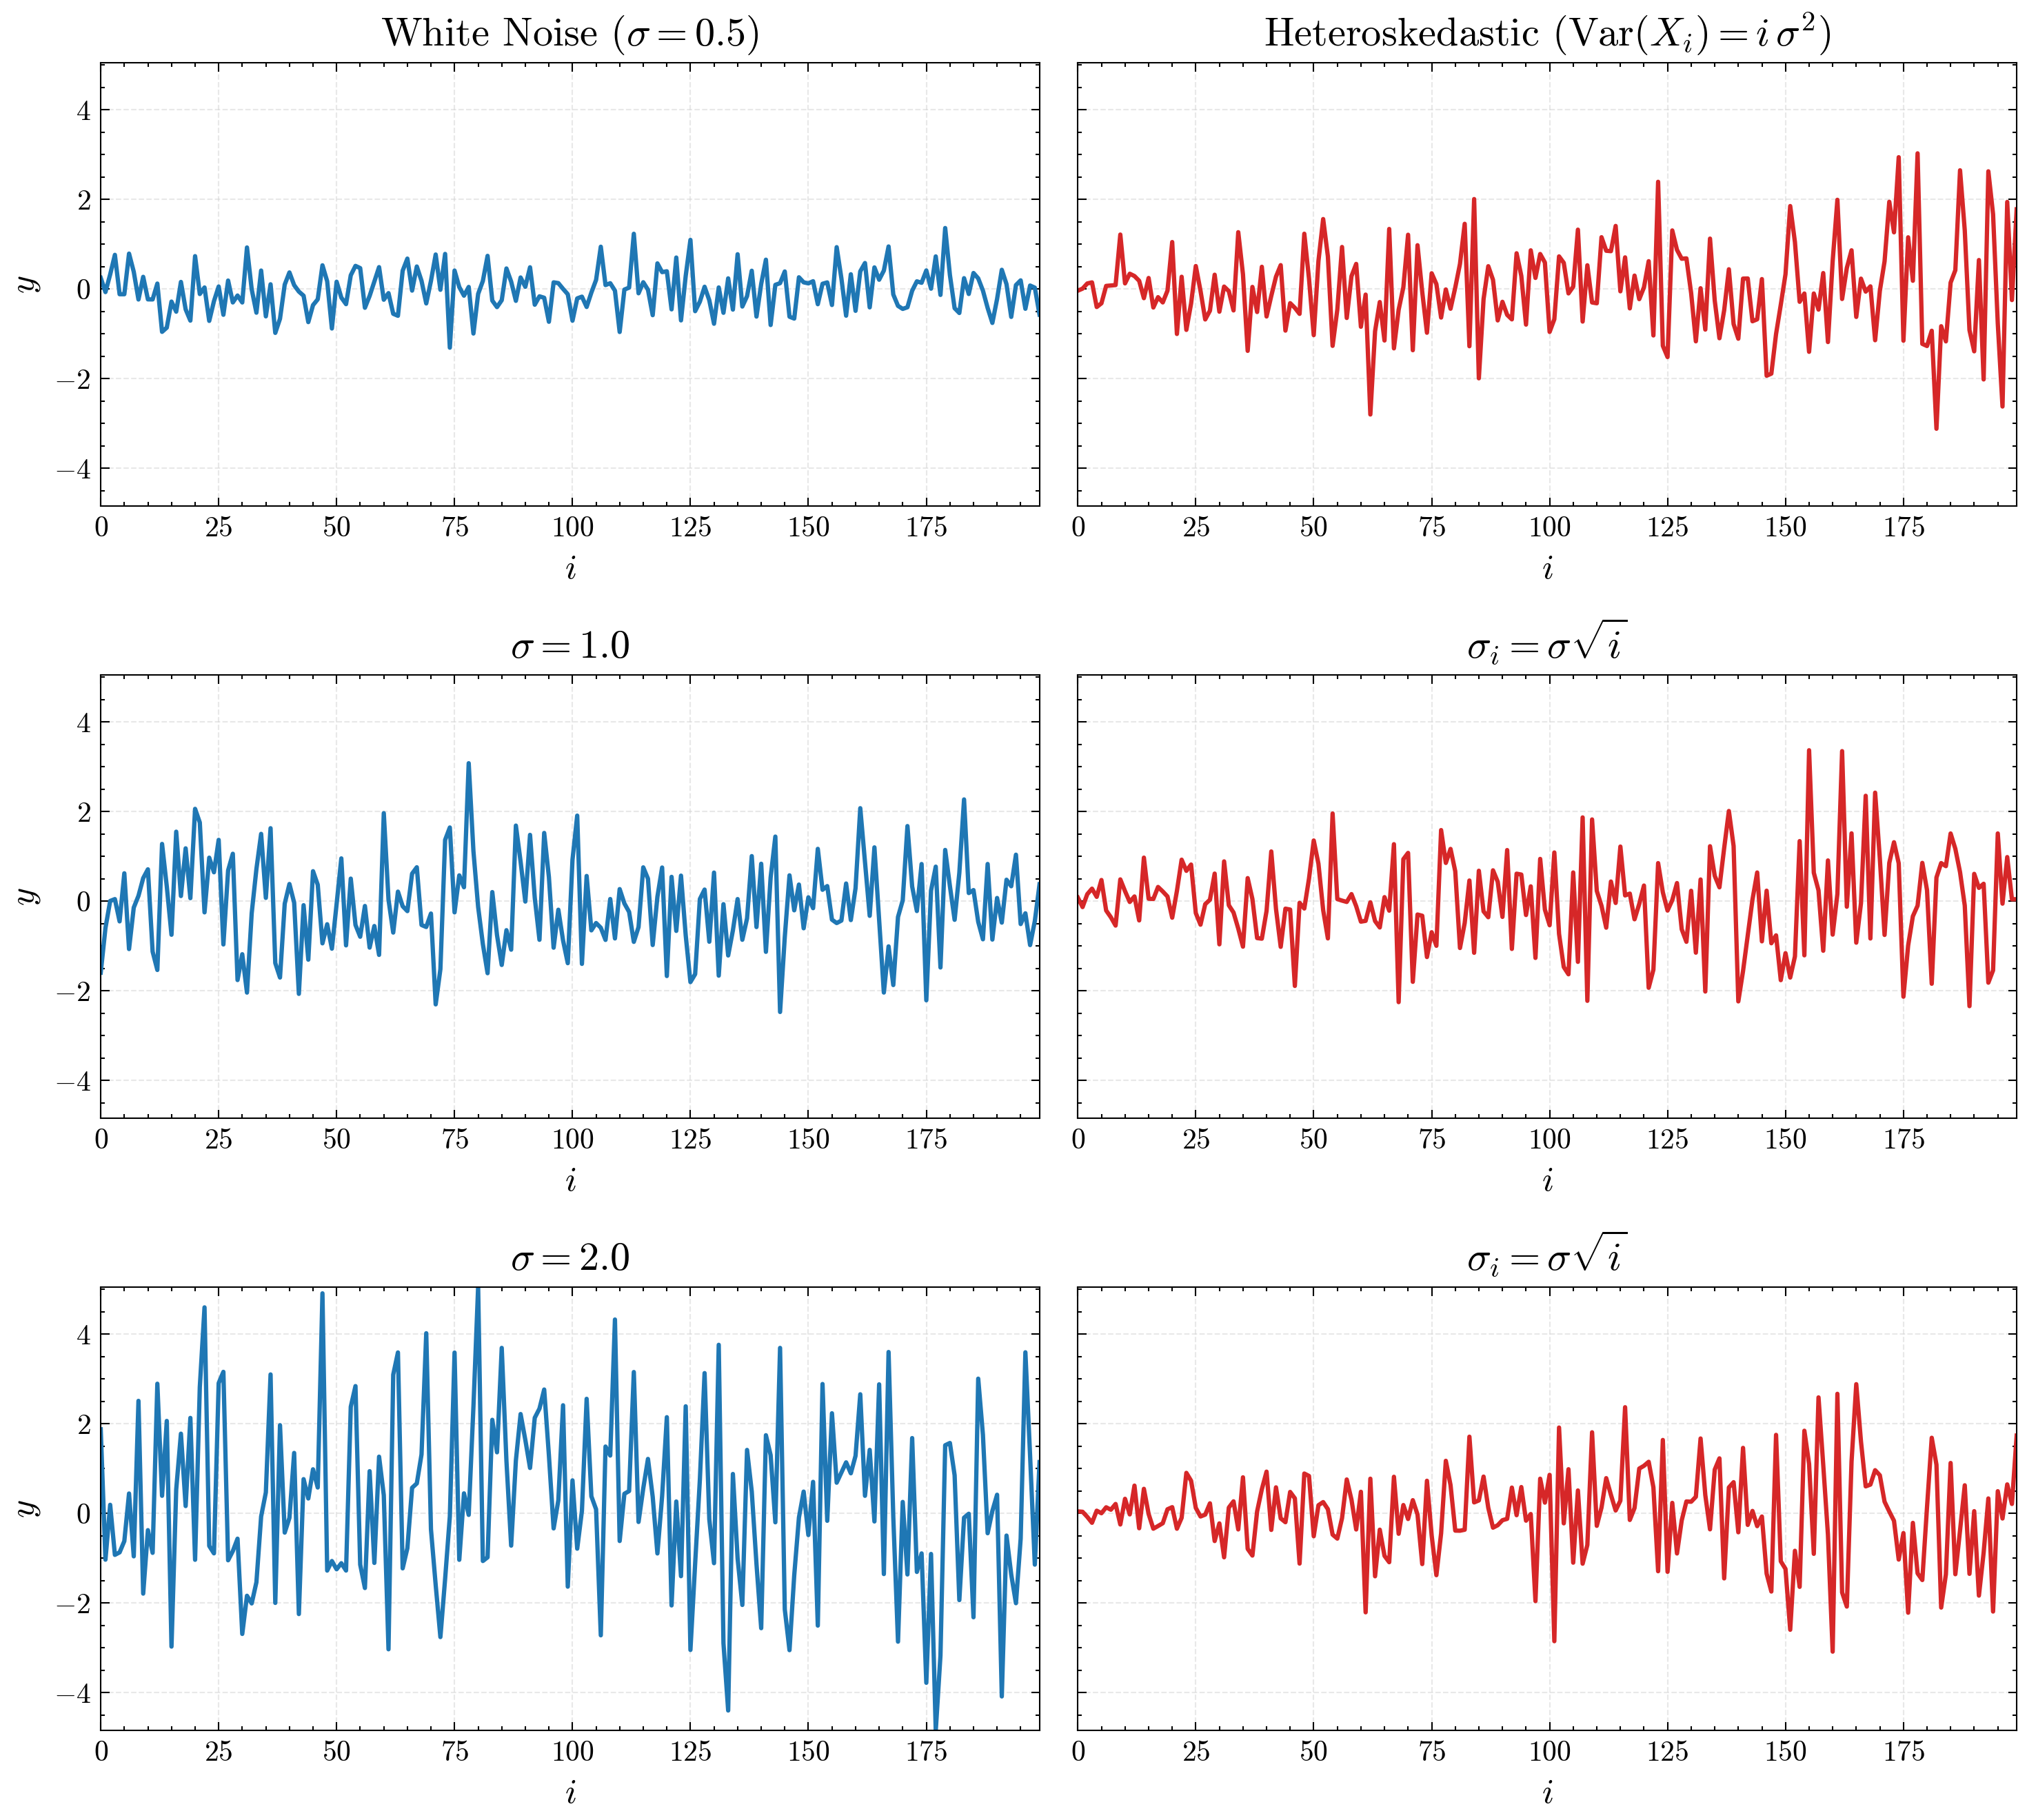

In [4]:
from sltns.plots._plots import TimeSeriesPlotter

sigmas = [0.5, 1.0, 2.0]
configs = []
for σ in sigmas:
    configs.append({"kind": "white_noise", "sigma": σ})
    configs.append({"kind": "heteroskedastic", "sigma": σ, "normalize": True})
# gives 6 plots: noise & RW at each σ
plotter = TimeSeriesPlotter(configs,
                            gridsize=(3, 2),
                            style="science",   # or "science" if you have SciencePlots
                            grid=True,
                            sharey=True,
                            use_tex=False)
plotter.plot()
plotter.save(
    "timeseries_comparison.png",
    dpi=600,
    figsize=(10, 10),
    format="png"
)

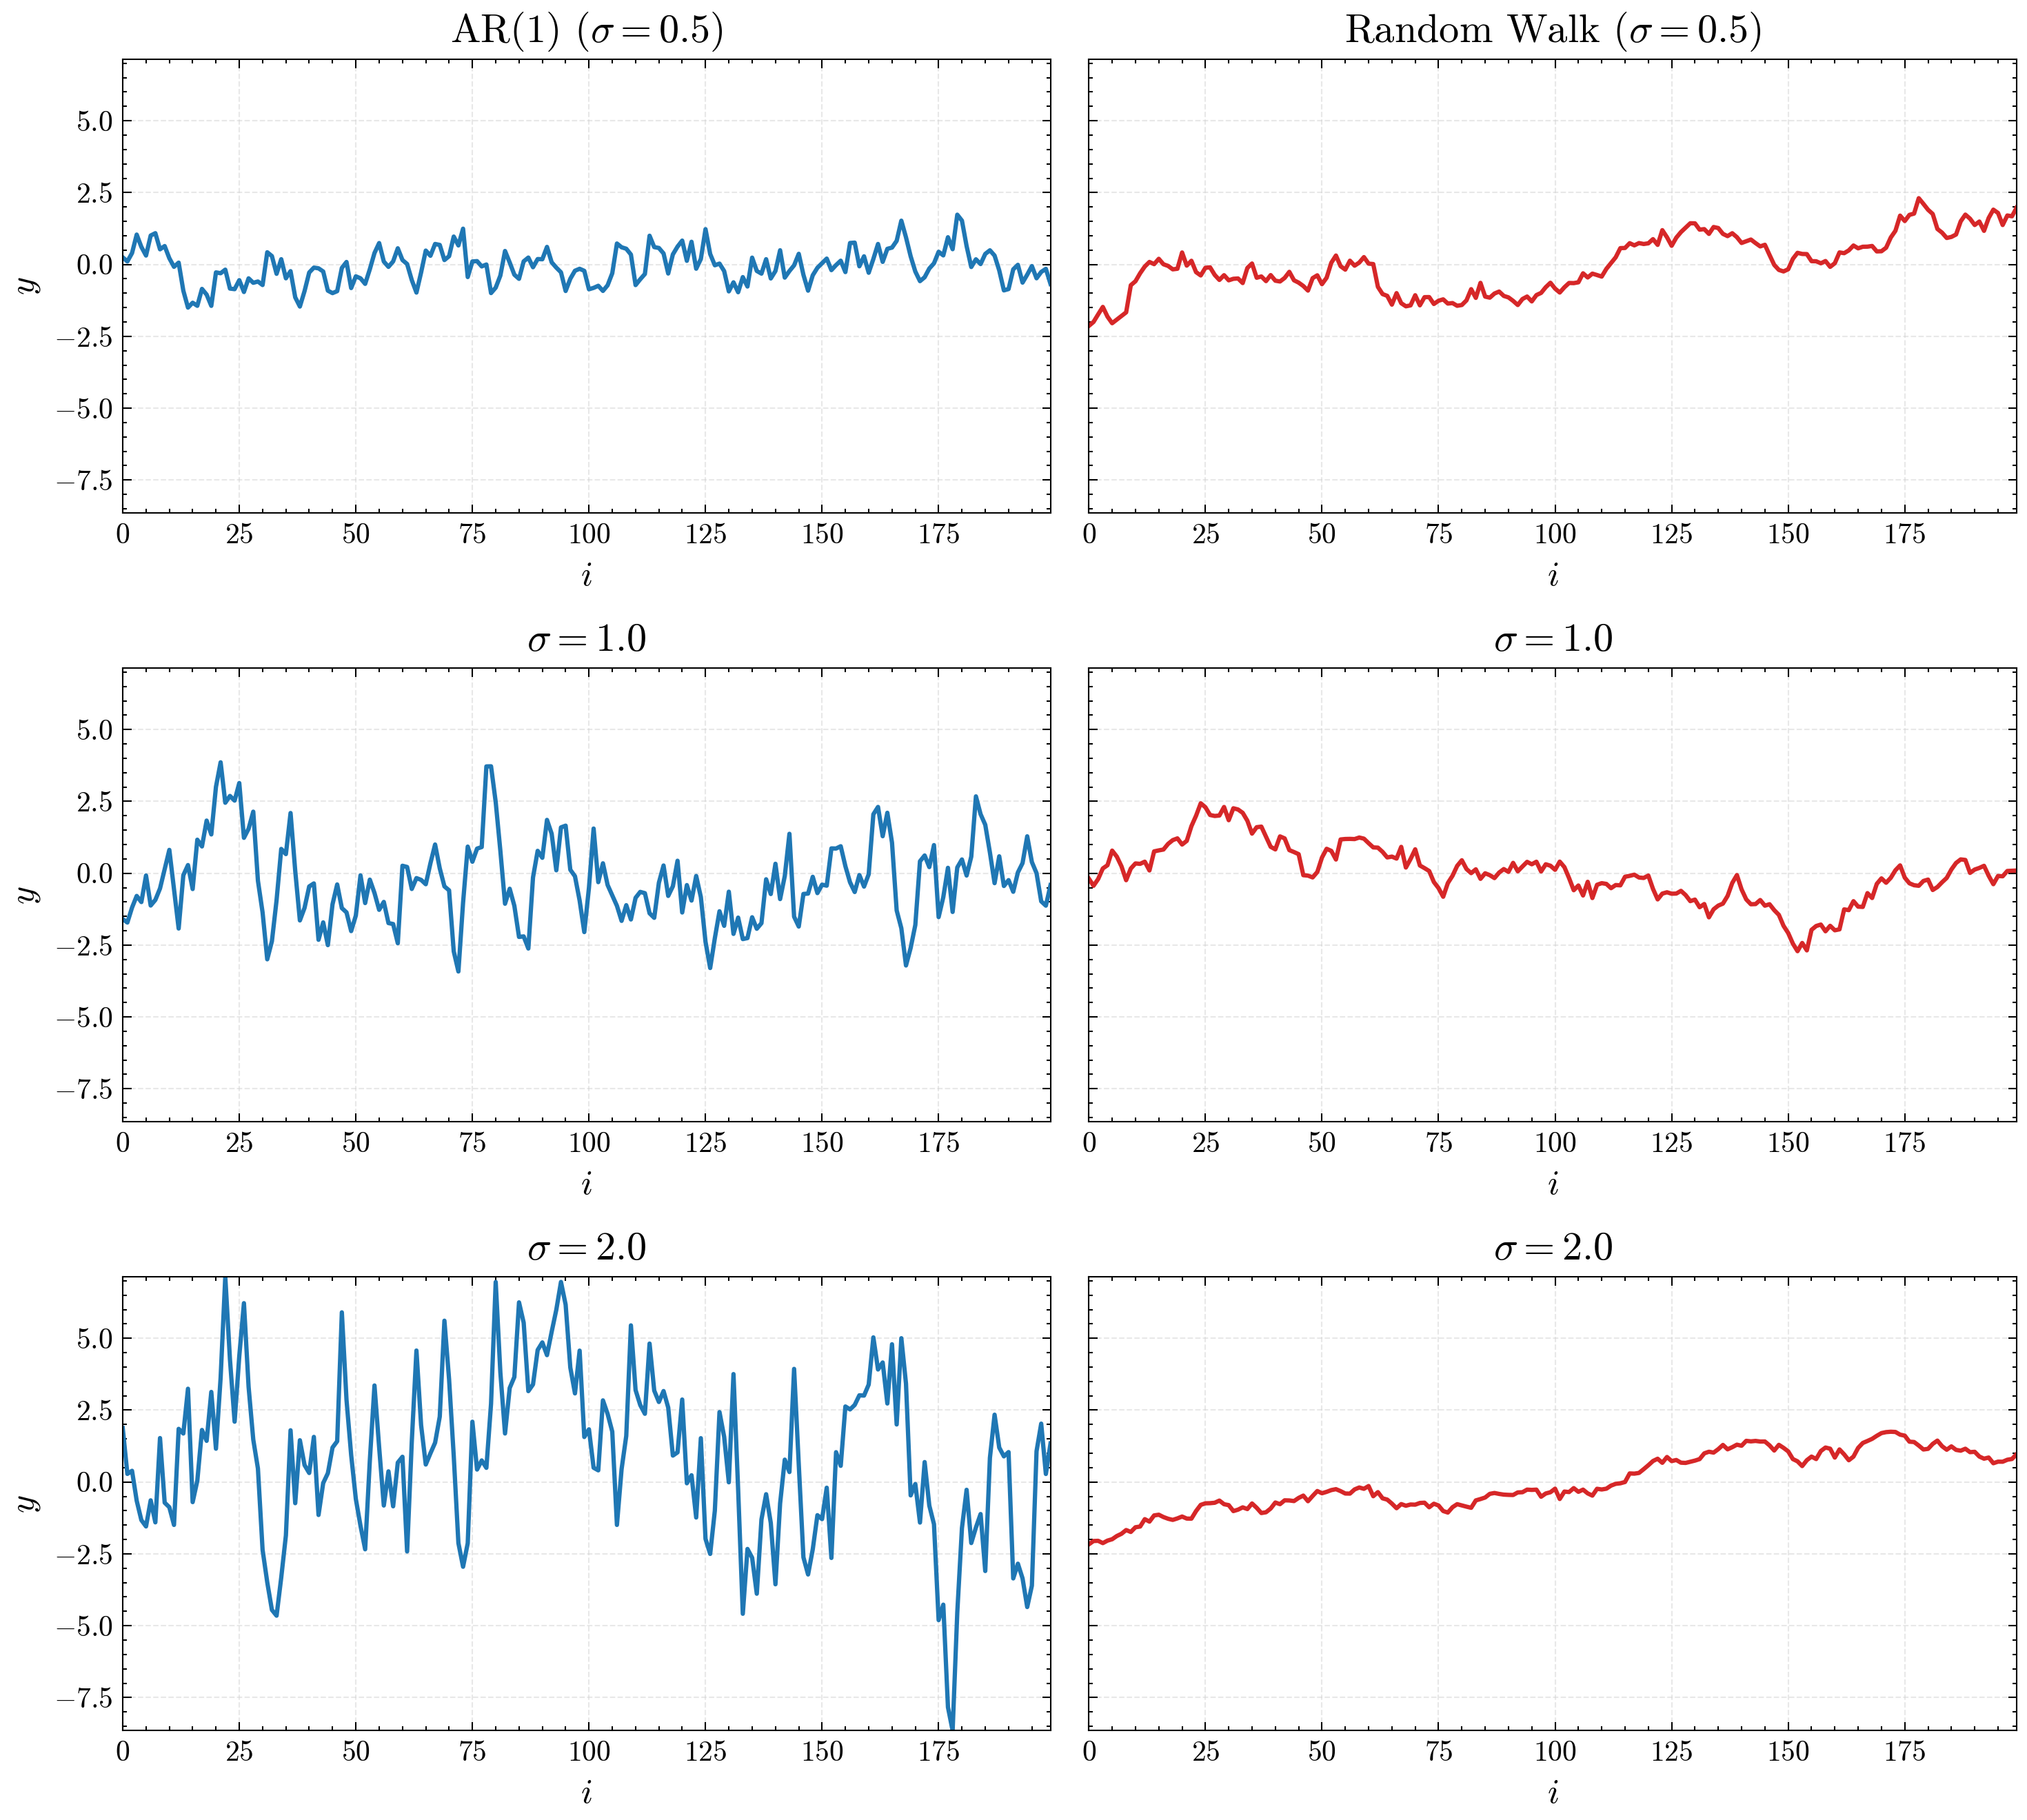

In [5]:
sigmas = [0.5, 1.0, 2.0]
configs = []
for σ in sigmas:
    configs.append({"kind": "ar1", "sigma": σ})
    configs.append({"kind": "random_walk", "sigma": σ, "normalize": True})
# gives 6 plots: noise & RW at each σ
plotter = TimeSeriesPlotter(configs,
                            gridsize=(3, 2),
                            style="science",   # or "science" if you have SciencePlots
                            grid=True,
                            sharey=True,
                            use_tex=False)
plotter.plot()
plotter.save(
    "timedep.png",
    dpi=600,
    figsize=(10, 10),
    format="png"
)

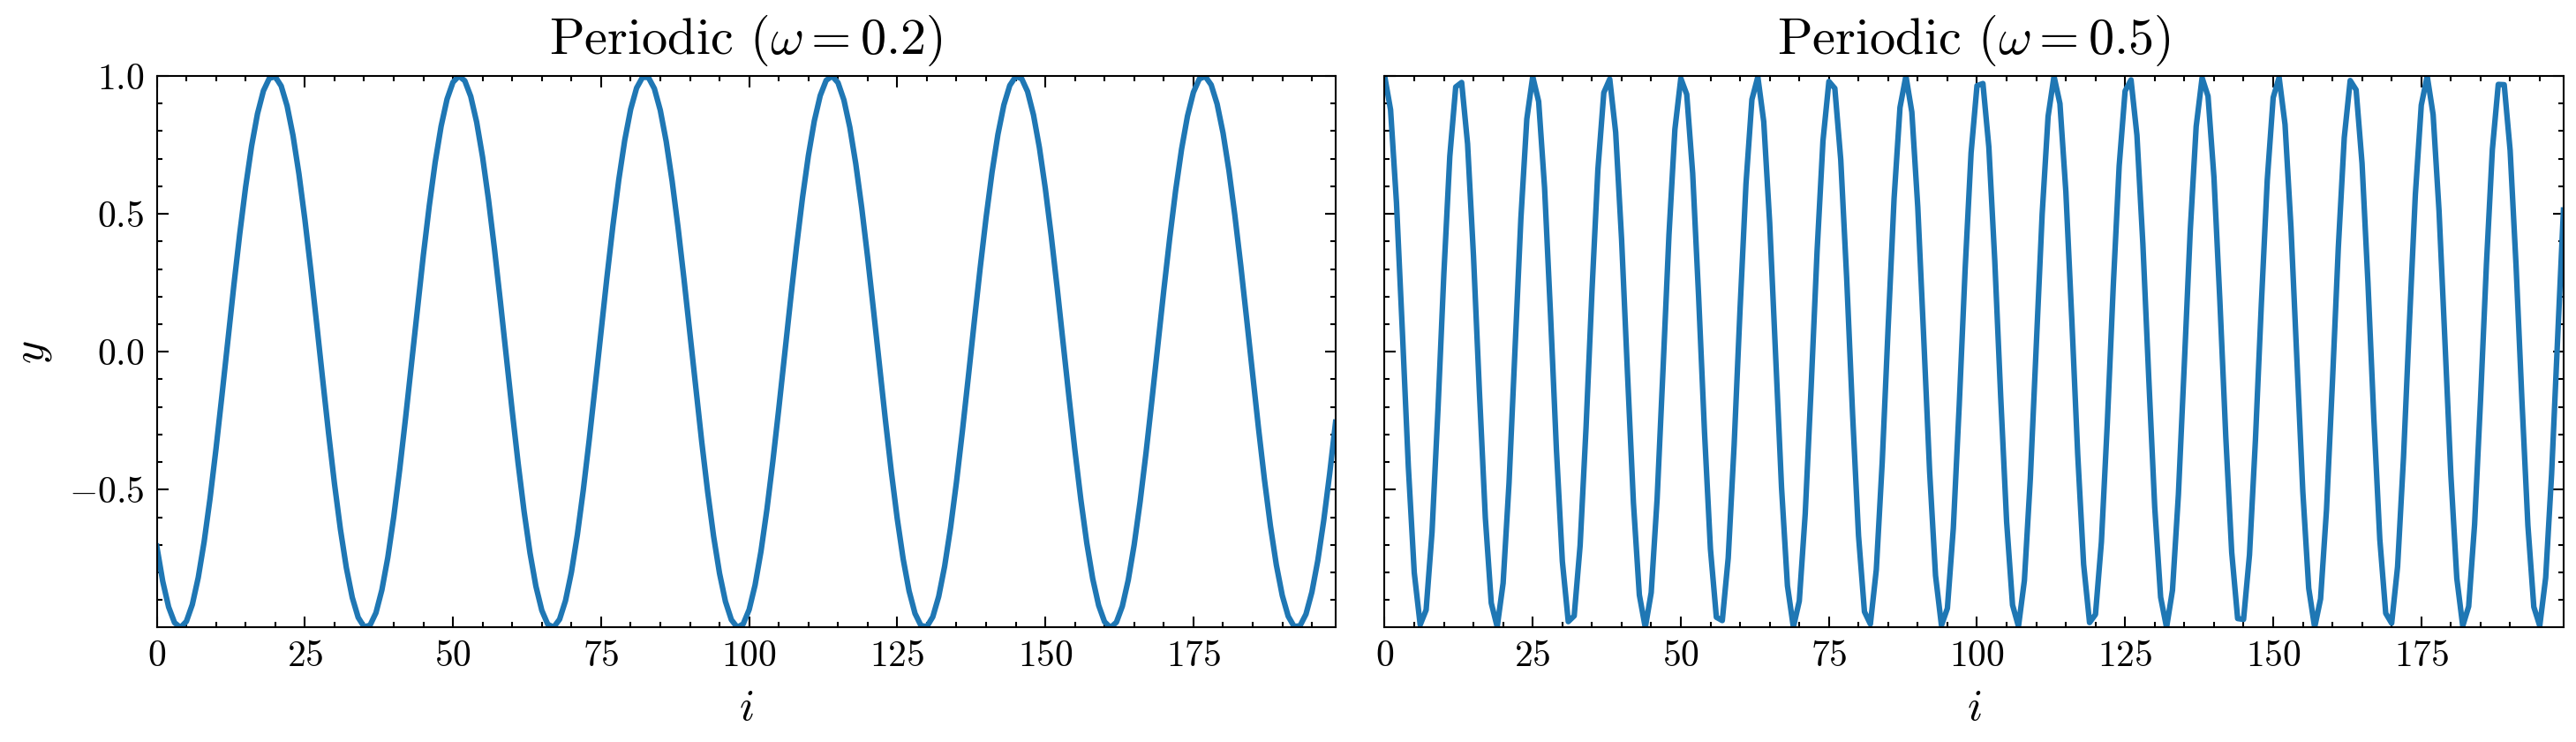

In [6]:
configs = [
  {"kind":"periodic","omega":0.2,"phase":True},
  {"kind":"periodic","omega":0.5,"phase":False},
]
plotter = TimeSeriesPlotter(configs, gridsize=(1,2), style="science", sharey=True)
plotter.plot()
plotter.save(
    "timenonmix.png",
    dpi=600,
    figsize=(8, 3),
    format="png"
)